In [15]:
!pip install -r /content/requirments.txt


In [48]:
from atlast import AtLAST

In [49]:
import pickle

Band added
Instrument(1 array)
├ arrays:
│            n           FOV baseline   bands
│  array1  981  15.03 arcmin      0 m  [f093]
│ 
└ bands:
         center   width    η      NEP      NET_RJ     NET_CMB
   f093  93 GHz  53 GHz  0.5  30 aW√s  77.06 uK√s  96.49 uK√s


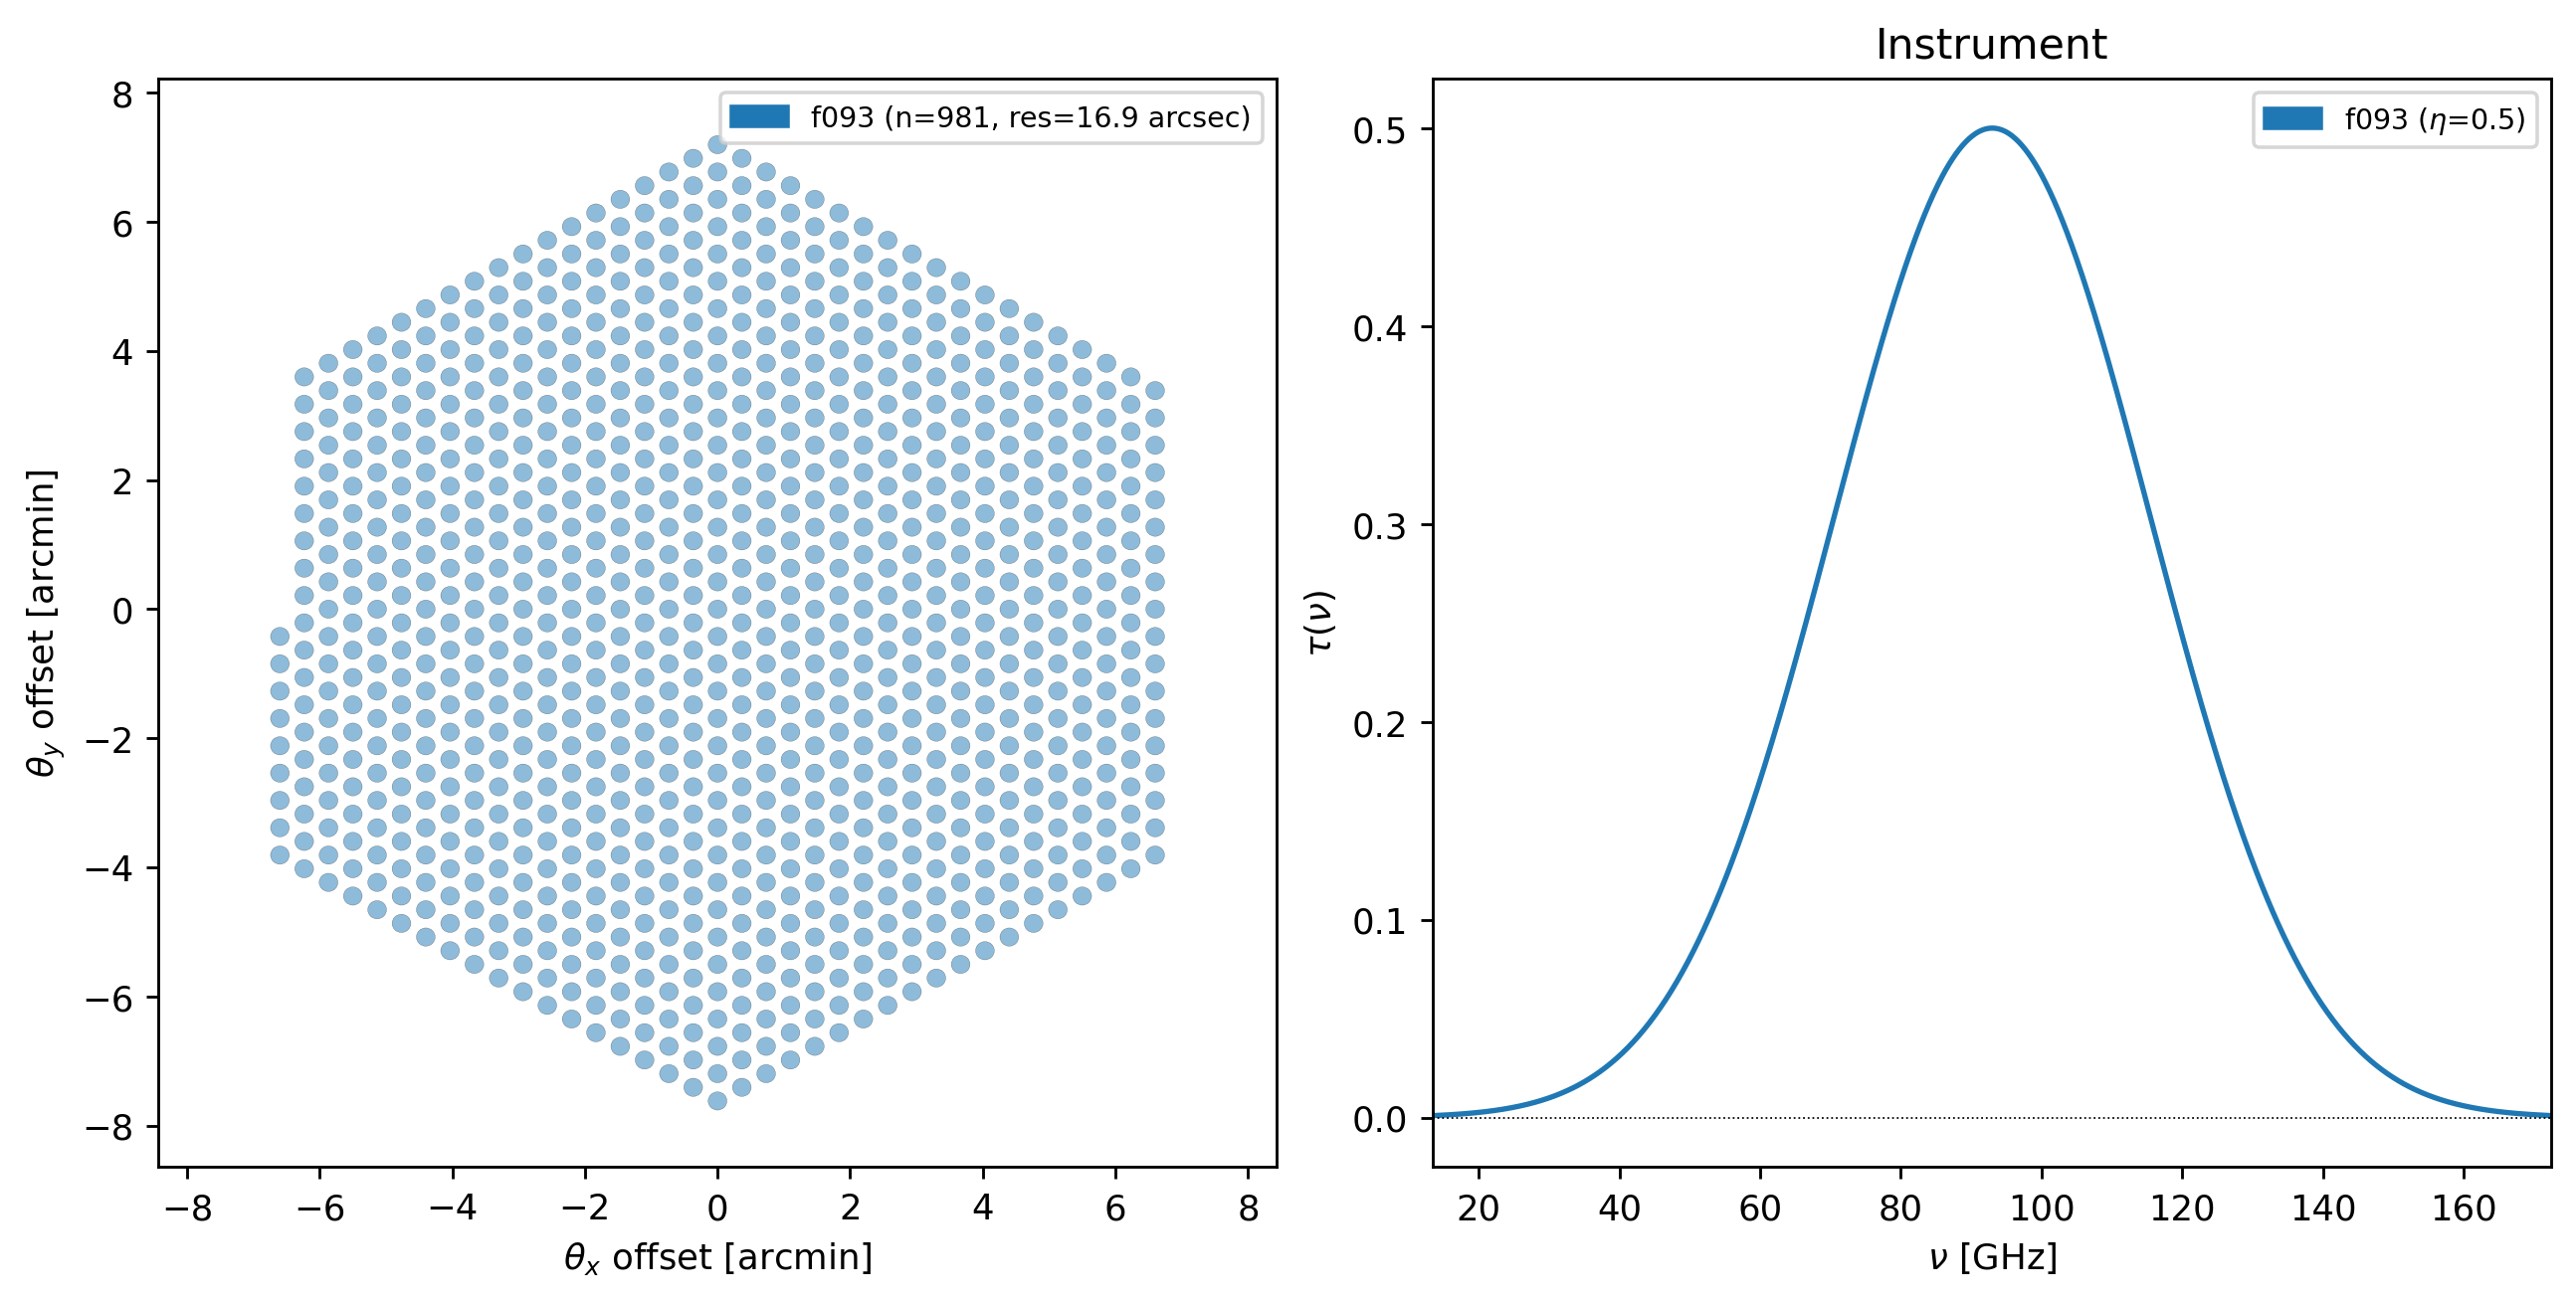

In [50]:
atlast_obj = AtLAST(nsample=1, file_path='/content/3c288.fits')
# add bands to the instrument
atlast_obj.add_band(center=93e9, width=53e9, efficiency=0.5, shape="gaussian" ,time_constant=0, gain_error=5e-2, NEP=3e-17, knee=1.00)

# instrument creation
instrument = atlast_obj.create_instrument(primary_size=50, field_of_view=0.25, shape="hexagon", bath_temp=100e-3)

# plot or save
atlast_obj.instrument_plot(save=False)


  0%|          | 0/8 [00:00<?, ?it/s]







iteration started for speed 0.01
Plan:
  start_time: 2022-08-01 23:00:00.000 +00:00
  duration: 600 s
  sample_rate: 50 Hz
  center:
    ra: 17ʰ19ᵐ60.00ˢ
    dec: -20°0’0”
  scan_pattern: daisy
  scan_kwargs: {'radius': 0.05, 'speed': 0.01}


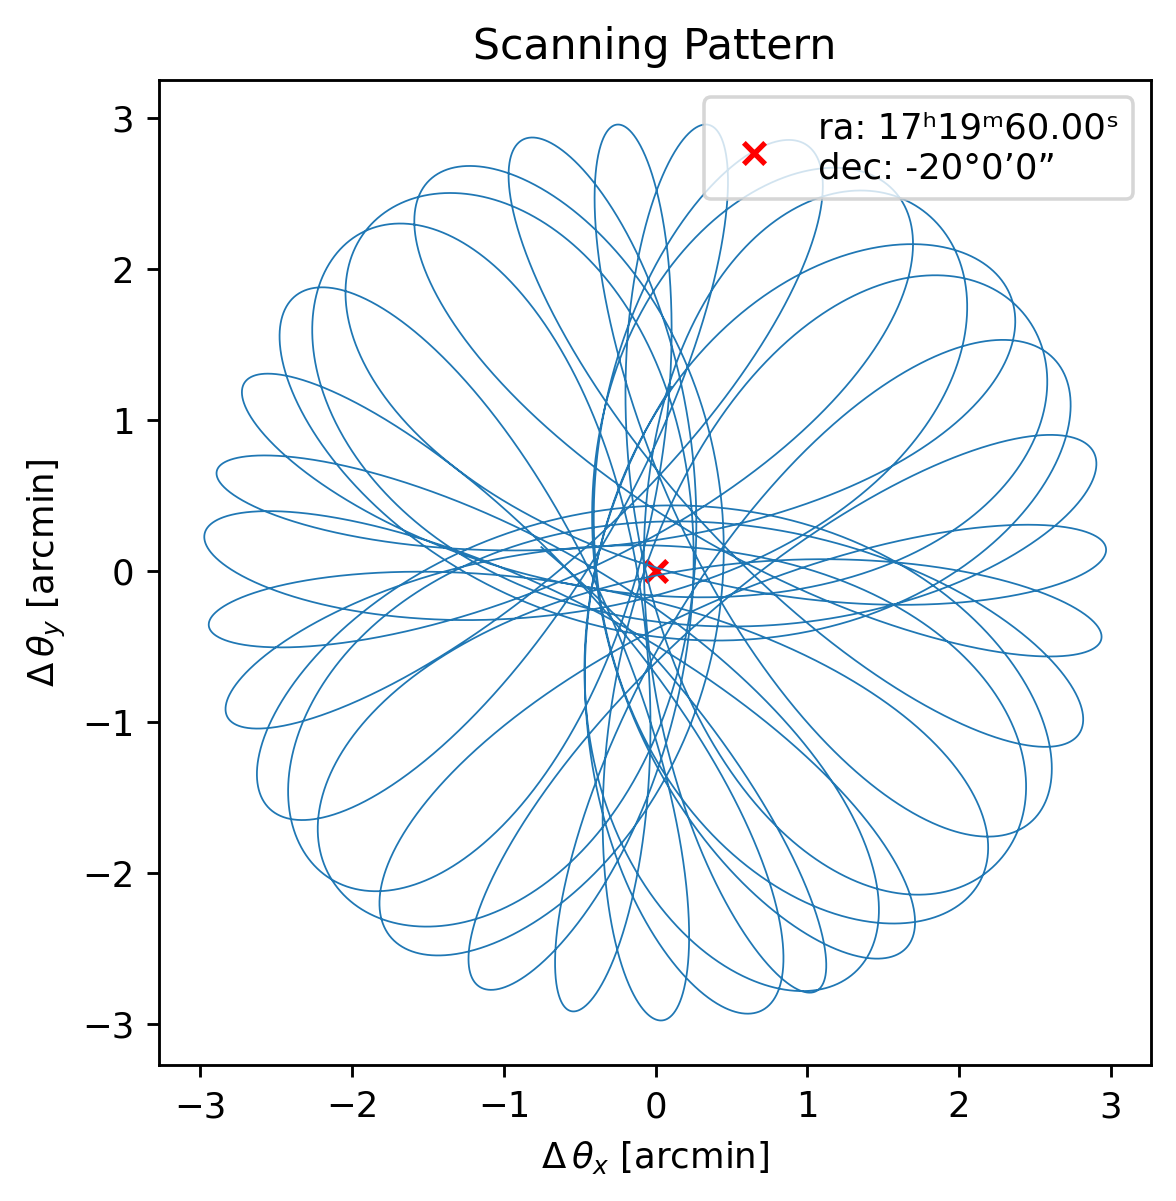

 12%|█▎        | 1/8 [00:00<00:02,  2.75it/s]







iteration started for speed 0.02
Plan:
  start_time: 2022-08-01 23:00:00.000 +00:00
  duration: 600 s
  sample_rate: 50 Hz
  center:
    ra: 17ʰ19ᵐ60.00ˢ
    dec: -20°0’0”
  scan_pattern: daisy
  scan_kwargs: {'radius': 0.05, 'speed': 0.02}


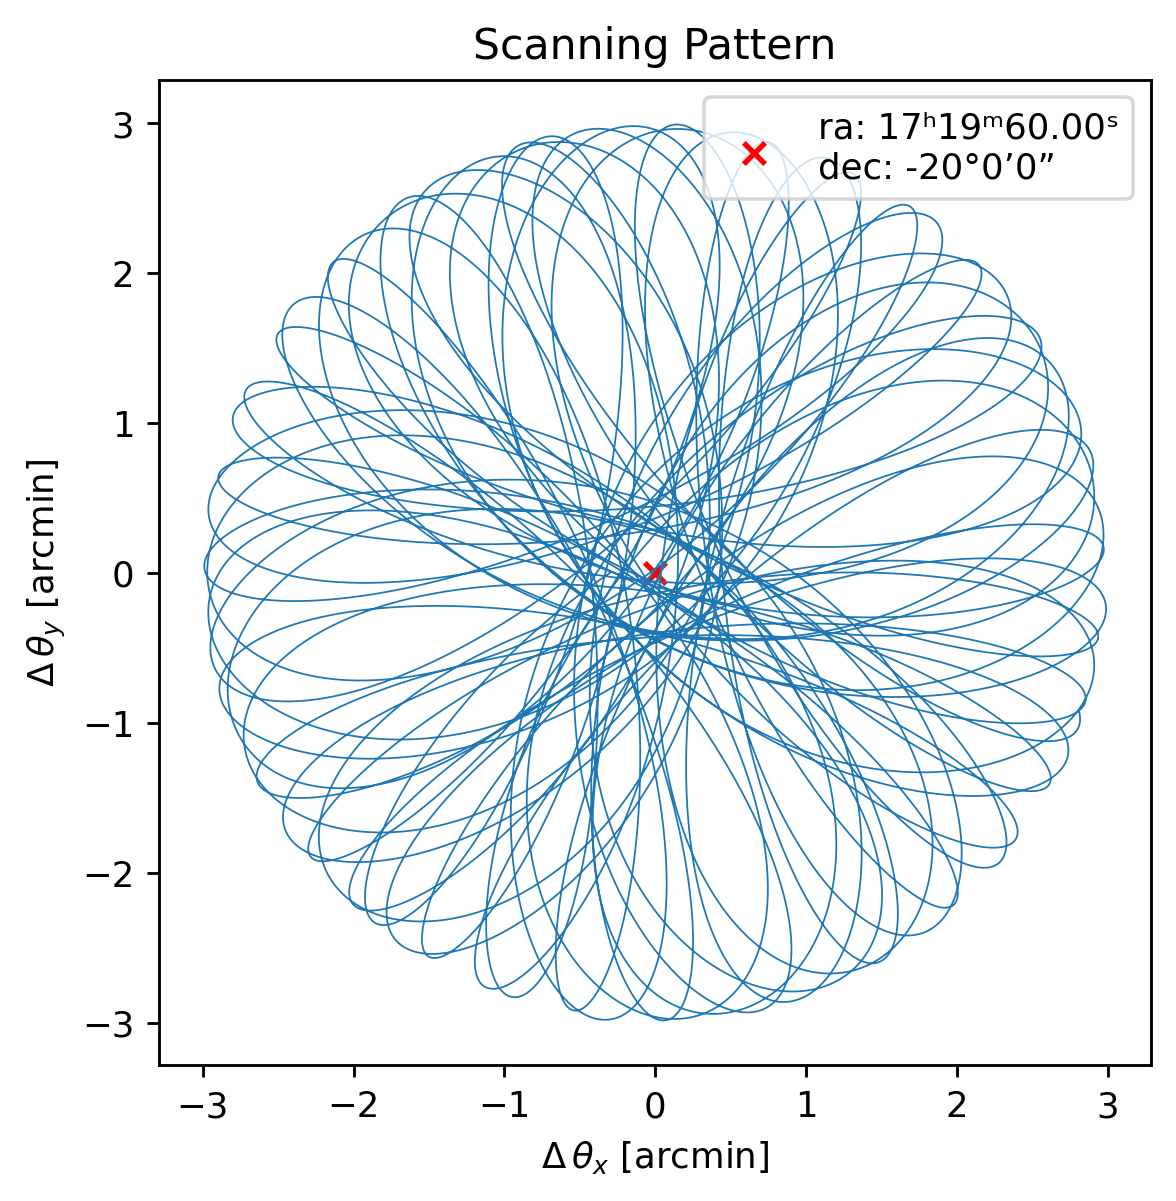

 25%|██▌       | 2/8 [00:00<00:02,  2.33it/s]







iteration started for speed 0.05
Plan:
  start_time: 2022-08-01 23:00:00.000 +00:00
  duration: 600 s
  sample_rate: 50 Hz
  center:
    ra: 17ʰ19ᵐ60.00ˢ
    dec: -20°0’0”
  scan_pattern: daisy
  scan_kwargs: {'radius': 0.05, 'speed': 0.05}


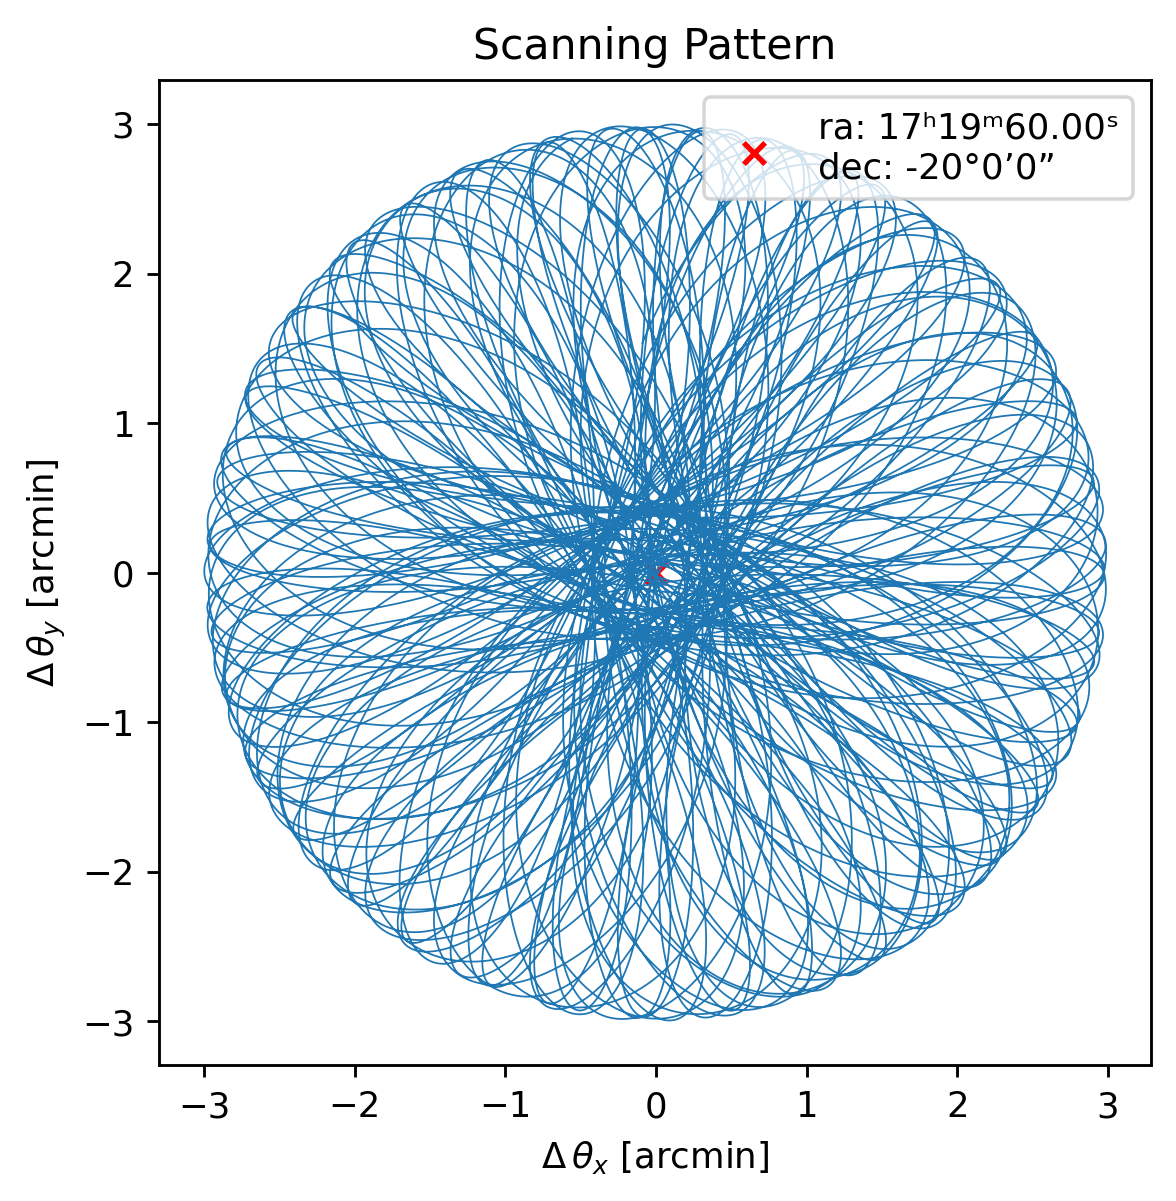

 38%|███▊      | 3/8 [00:01<00:02,  2.05it/s]







iteration started for speed 0.08
Plan:
  start_time: 2022-08-01 23:00:00.000 +00:00
  duration: 600 s
  sample_rate: 50 Hz
  center:
    ra: 17ʰ19ᵐ60.00ˢ
    dec: -20°0’0”
  scan_pattern: daisy
  scan_kwargs: {'radius': 0.05, 'speed': 0.08}


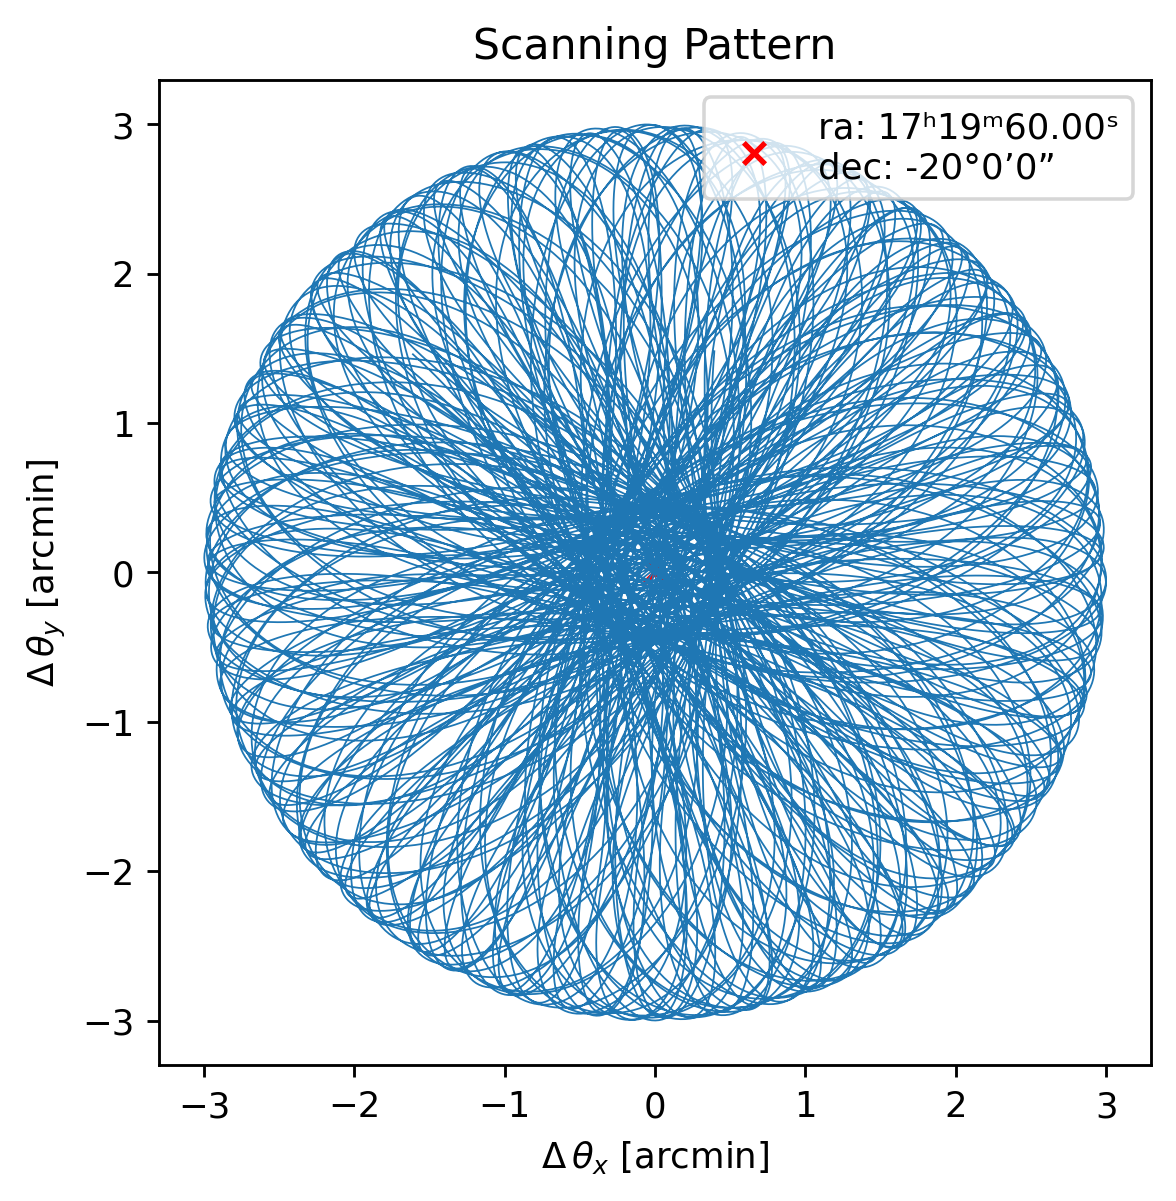

 50%|█████     | 4/8 [00:02<00:02,  1.65it/s]







iteration started for speed 0.1
Plan:
  start_time: 2022-08-01 23:00:00.000 +00:00
  duration: 600 s
  sample_rate: 50 Hz
  center:
    ra: 17ʰ19ᵐ60.00ˢ
    dec: -20°0’0”
  scan_pattern: daisy
  scan_kwargs: {'radius': 0.05, 'speed': 0.1}


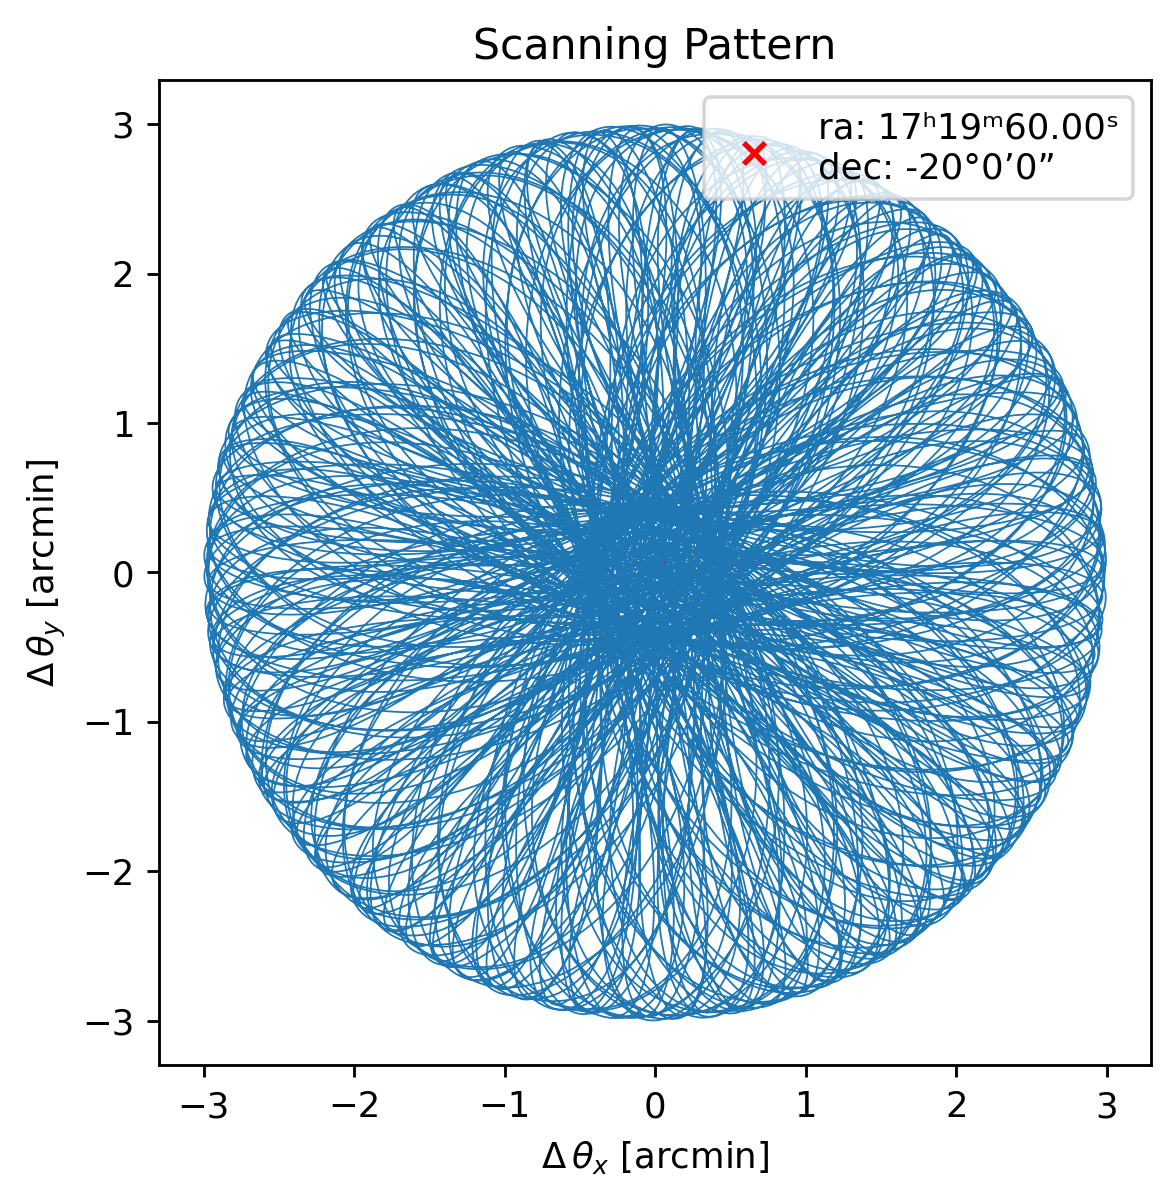

 62%|██████▎   | 5/8 [00:03<00:02,  1.41it/s]







iteration started for speed 0.15
Plan:
  start_time: 2022-08-01 23:00:00.000 +00:00
  duration: 600 s
  sample_rate: 50 Hz
  center:
    ra: 17ʰ19ᵐ60.00ˢ
    dec: -20°0’0”
  scan_pattern: daisy
  scan_kwargs: {'radius': 0.05, 'speed': 0.15}


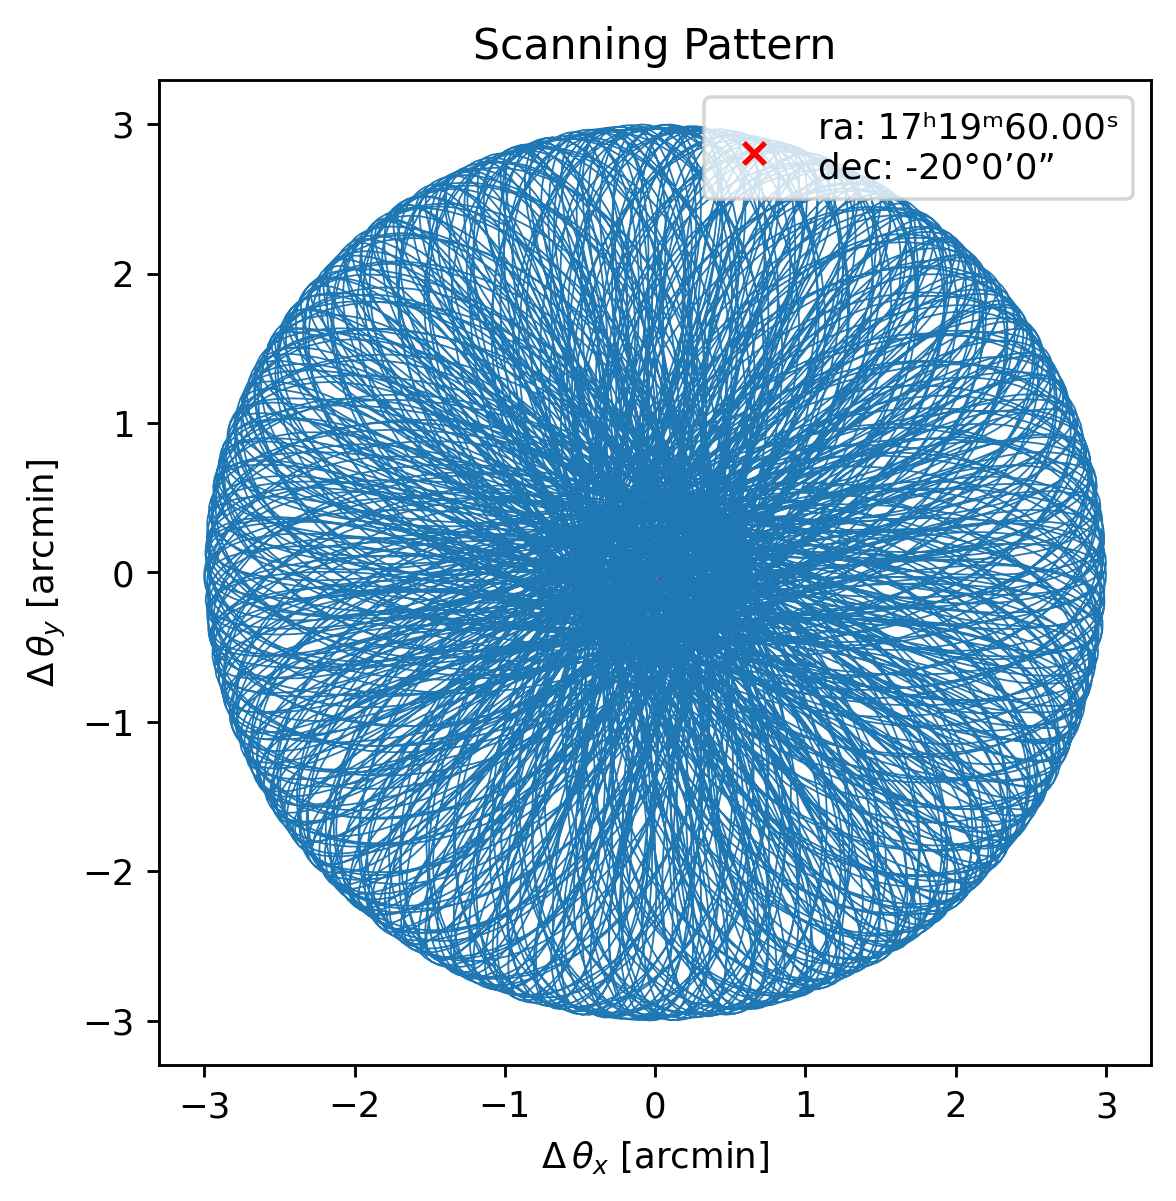

 75%|███████▌  | 6/8 [00:03<00:01,  1.31it/s]







iteration started for speed 0.2
Plan:
  start_time: 2022-08-01 23:00:00.000 +00:00
  duration: 600 s
  sample_rate: 50 Hz
  center:
    ra: 17ʰ19ᵐ60.00ˢ
    dec: -20°0’0”
  scan_pattern: daisy
  scan_kwargs: {'radius': 0.05, 'speed': 0.2}


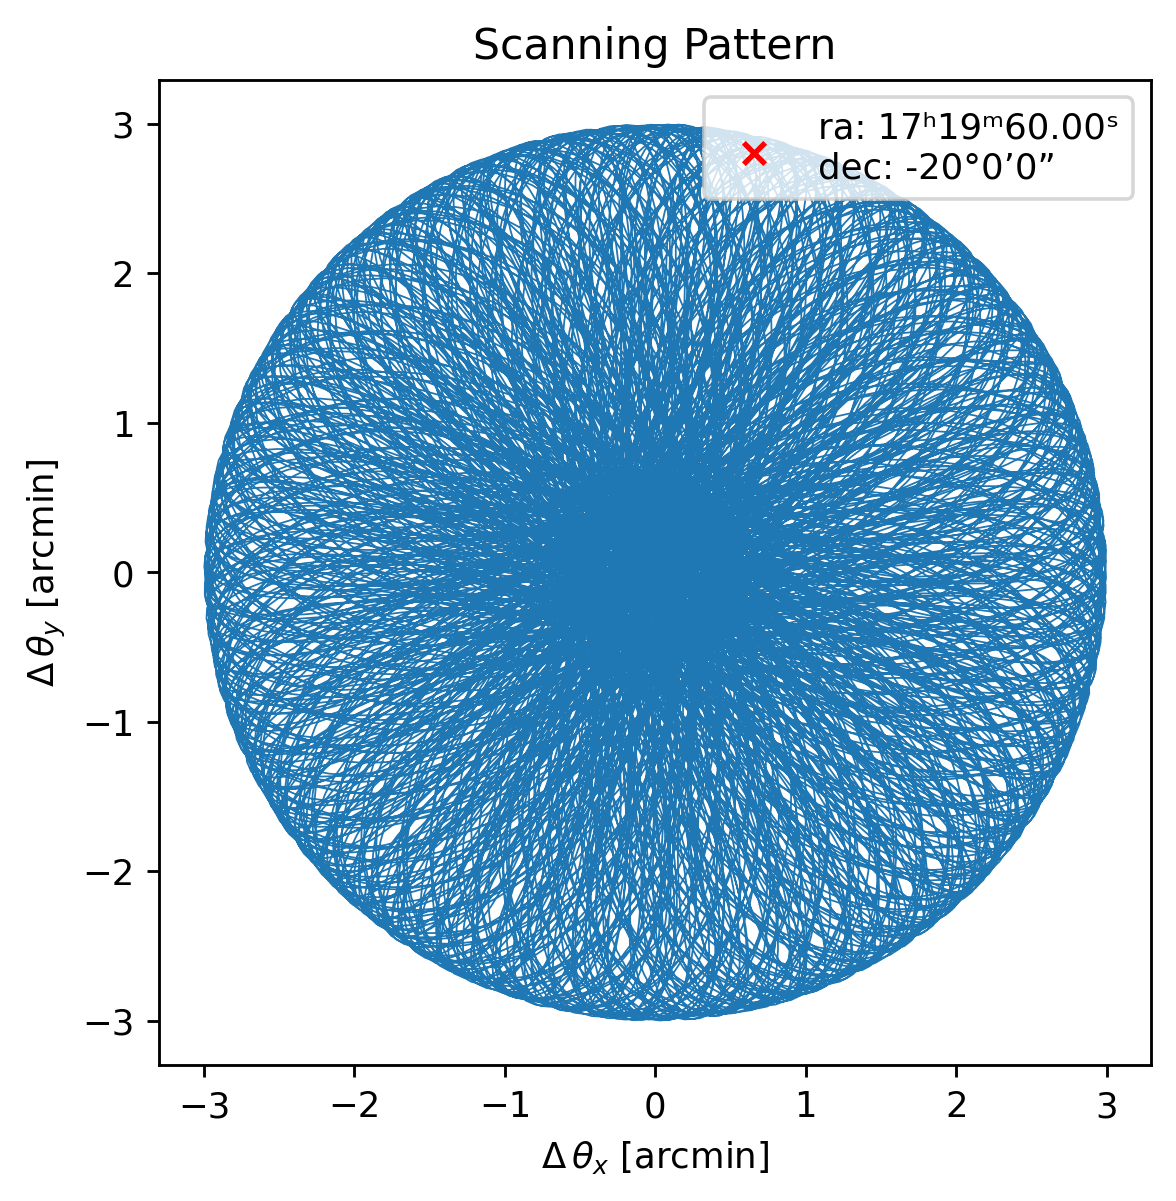

 88%|████████▊ | 7/8 [00:04<00:00,  1.17it/s]WARNING:maria:The maximum acceleration of the boresight (21.3 deg/s^2) is physically unrealistic. If this is undesired, double-check the parameters for your scan strategy.








iteration started for speed 1
Plan:
  start_time: 2022-08-01 23:00:00.000 +00:00
  duration: 600 s
  sample_rate: 50 Hz
  center:
    ra: 17ʰ19ᵐ60.00ˢ
    dec: -20°0’0”
  scan_pattern: daisy
  scan_kwargs: {'radius': 0.05, 'speed': 1}


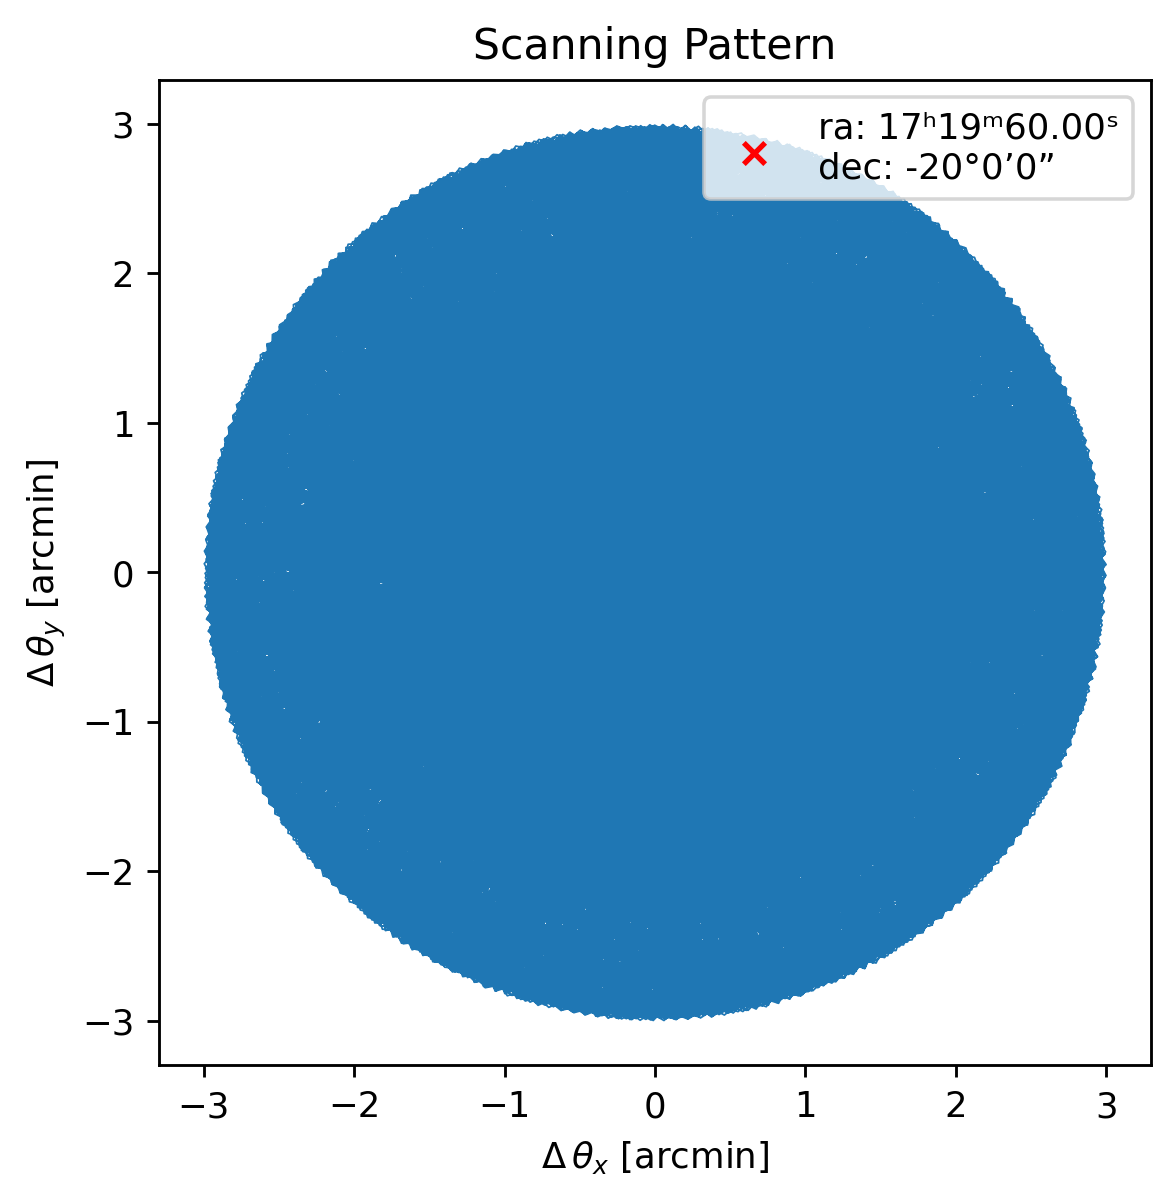

100%|██████████| 8/8 [00:06<00:00,  1.18it/s]


In [51]:
speed_list = [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2, 1]
tf_beam_data = {}
from tqdm import tqdm
for speed in tqdm(speed_list):
  temp = {"tf": 0, "beam":0, "edge_radii":0}
  print("\n"*5)
  print("="*10)
  print(f"iteration started for speed {speed}")

  # scanning pattern
  daisy_track = atlast_obj.scanning_pattern(start_time="2022-08-01T23:00:00",
      scan_pattern="daisy",
      scan_options={"radius": 0.05, "speed": speed}, # in degrees
      duration=600, # in seconds
      sample_rate=50, # in Hz
      scan_center=(260, -20) # in degrees
  )
  atlast_obj.scan_pattern_plot(save=False)


In [7]:
speed_list = [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2, 1]
tf_beam_data = {}
from tqdm import tqdm
for speed in tqdm(speed_list):
  temp = {"tf": 0, "beam":0, "edge_radii":0}
  print("\n"*5)
  print("="*10)
  print(f"iteration started for speed {speed}")

  # scanning pattern
  daisy_track = atlast_obj.scanning_pattern(start_time="2022-08-01T23:00:00",
      scan_pattern="daisy",
      scan_options={"radius": 0.05, "speed": speed}, # in degrees
      duration=600, # in seconds
      sample_rate=50, # in Hz
      scan_center=(260, -20) # in degrees
  )
  atlast_obj.scan_pattern_plot(save=False)
  input_map = atlast_obj.load_input_map(resolution=1.00E+00/3.60E+03,center=(260,-20),nu=1.50E+11,units="Jy/pixel")
  atlast_obj.input_map_plot(input_map, save=False)
  tod = atlast_obj.run_sim(site_name="llano_de_chajnantor", atmosphere="2d", atmosphere_kwargs={"weather": {"pwv": 0.5}})
  atlast_obj.tod_plot(tod)
  input_map, output_map, outhdu = atlast_obj.generate_output_map(center=(260,-20),units="uK_RJ",width=0.4,height=0.4,resolution=3.00E+00/3.60E+03,tod_preprocessing={"window": {"name": "tukey", "kwargs": {"alpha": 0.1}},"remove_modes": {"modes_to_remove": [0]},"remove_spline": {"knot_spacing": 10}})
  atlast_obj.output_map_plot(output_map, save=False)
  atlast_obj.power_spectrum(input_map, output_map)
  atlast_obj.save_PS()
  output_file_lists = 'out_power.fits' if atlast_obj.nsample==1 else [f'out_power_{i}.fits' for i in range(atlast_obj.nsample)]
  input_file_lists = 'inp_power.fits' if atlast_obj.nsample==1 else [f'inp_power_{i}.fits' for i in range(atlast_obj.nsample)]
  inp_data, outp_data, inp_header, outp_header = atlast_obj.load_PS(input=input_file_lists, output=output_file_lists)
  transfer_function, edge_radii, max_radius = atlast_obj.compute_transfer_function(inp_data=inp_data,  outp_data=outp_data)
  temp["tf"] = transfer_function
  atlast_obj.transfer_function_plot(transfer_function, edge_radii,scale='linear' ,save=False)
  beam_psd, edge_radii, fwhm_rad, sigma_beam_dimensionless=atlast_obj.detector_beam_PS(max_radius, instrument, atlast_obj.inpsamp, outhdu)
  atlast_obj.beam_ps_plot(beam_psd=beam_psd, edge_radii=edge_radii, transfer_function=transfer_function,scale='linear', save=True)

  temp["beam"] = beam_psd
  temp["edge_radii"] = edge_radii
  tf_beam_data[speed] = temp
  atlast_obj.save_log_file(f"demo_log_speed_{speed}.txt")
  print(f"iteration completed for speed {speed}")
  print("="*10)
  print("\n"*5)
  pickle.dump(tf_beam_data, open("tf_beam_data.pkl", "wb"))



















In [4]:
data = pickle.load(open("/content/tf_beam_data.pkl", "rb"))

np.float64(0.0)

In [6]:
data.keys()

dict_keys([0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2, 1])

In [15]:
d1 = data[0.01]
len(d1["edge_radii"])

24000



 speed:  0.01 



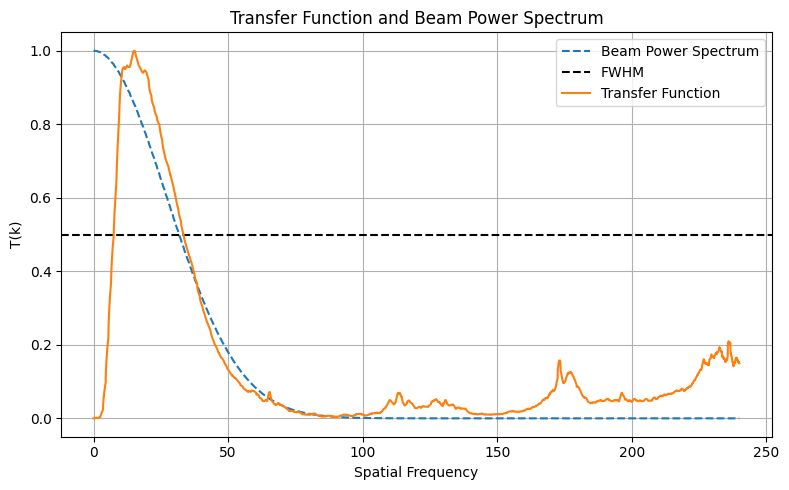



 speed:  0.02 



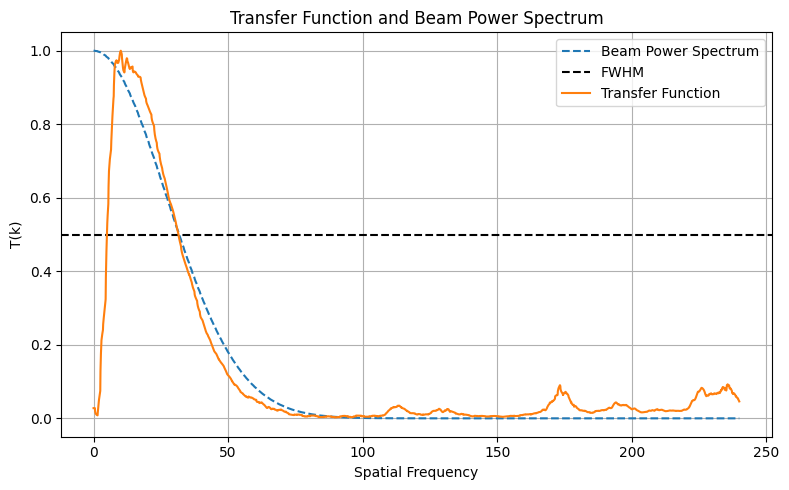



 speed:  0.05 



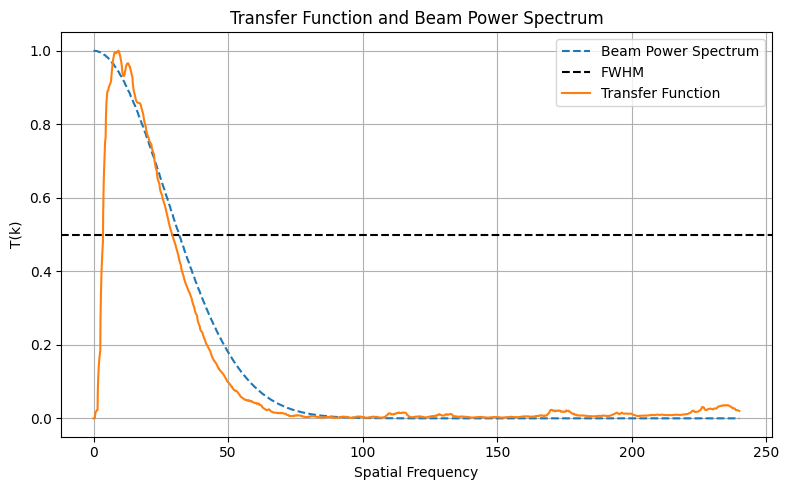



 speed:  0.08 



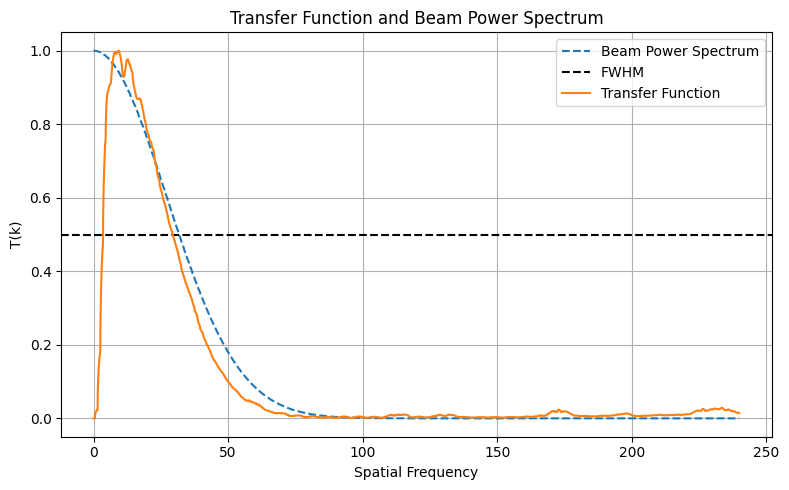



 speed:  0.1 



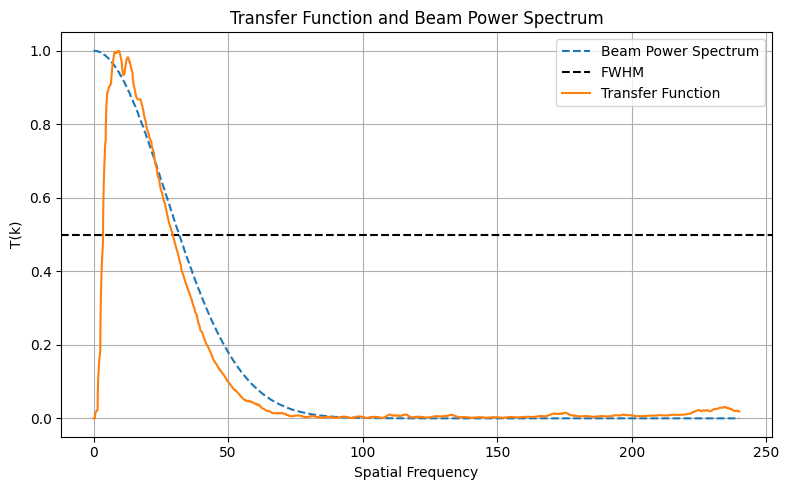



 speed:  0.15 



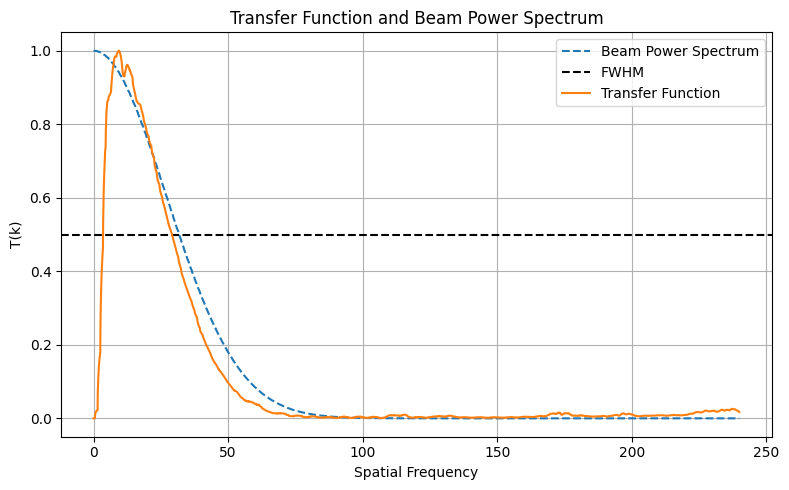



 speed:  0.2 



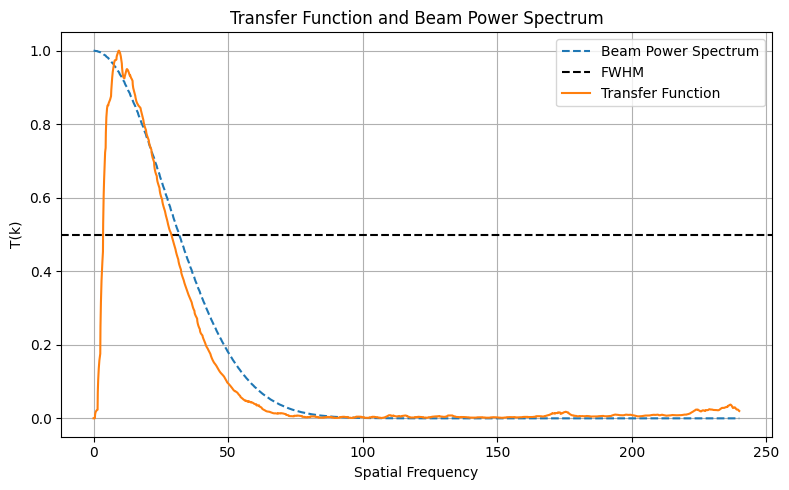



 speed:  1 



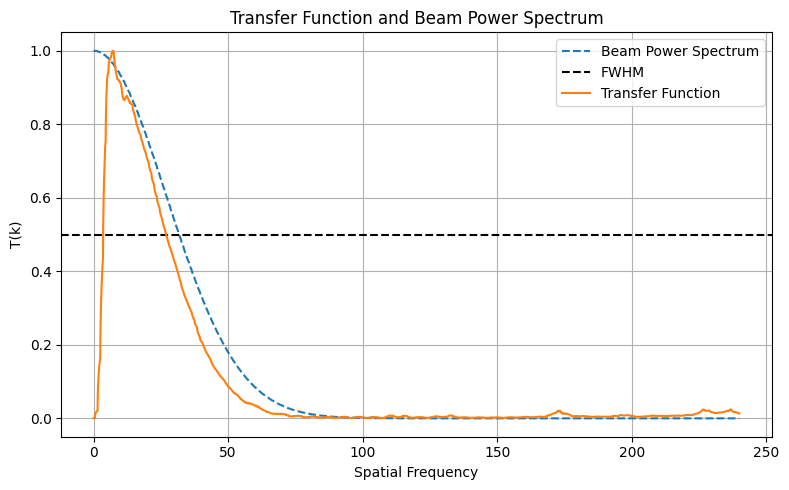

In [53]:
for speed in data.keys():
  print("\n\n speed: ", speed,"\n")

  atlast_obj.beam_ps_plot(data[speed]['beam'],data[speed]['edge_radii'][:-1],data[speed]['tf'],  scale='linear')

In [38]:
import matplotlib.pyplot as plt
scale = 'linear'

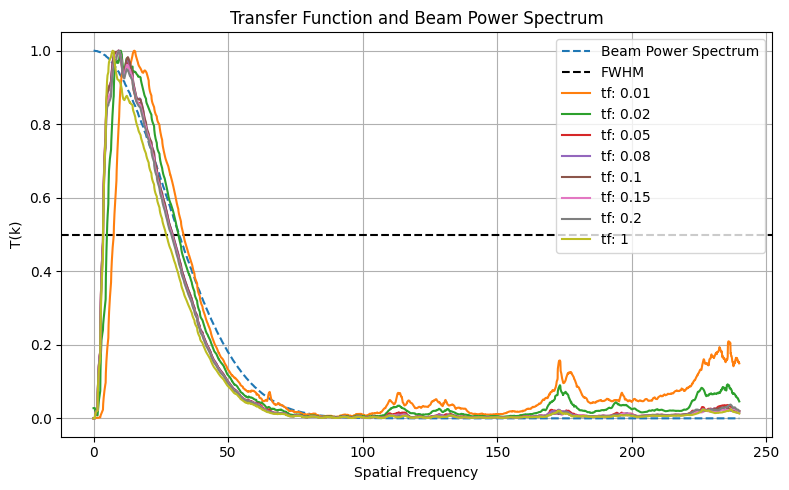

In [55]:

plt.figure(figsize=(8, 5))  # Create new figure
plt.plot(data[0.01]['edge_radii'][:len(data[0.01]['beam'])], data[0.01]['beam'],  label='Beam Power Spectrum', linestyle='--')
plt.axhline(0.5, color='black', linestyle='--', label='FWHM')
for speed in data.keys():
  plt.plot(data[speed]['edge_radii'][:len(data[speed]['beam'])], data[speed]['tf'], label=f'tf: {speed}')
plt.xscale(scale)
plt.yscale(scale)
plt.xlabel("Spatial Frequency")
plt.ylabel("T(k)")
plt.title("Transfer Function and Beam Power Spectrum")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()